In [3]:
from google.colab import files
uploaded = files.upload()

Saving INF2178_A2_data.xlsx to INF2178_A2_data.xlsx


# 2178 Assignment2
## Student name:Jianheng Chen
## Student number:1005680746
## Instructor:Shion Guha
## Course:INF2178

# Importing the dataset

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat

# Load the dataset
data = pd.read_excel('INF2178_A2_data.xlsx')

# Display the first few rows, we need to check if there is any
# missing value like we did in A1
print(data.head())
data.describe(include='all')

# Check dataset info, cleaning
print(data.info())
missing = data.isnull().sum()

print(missing)
# Then we know there are 348 missing values in the name
# of building children centre is located in

   _id  LOC_ID                                           LOC_NAME  \
0    1    1013              Lakeshore Community Child Care Centre   
1    2    1014            Alternative Primary School Parent Group   
2    3    1015     Cardinal Leger Child Care Centre (Scarborough)   
3    4    1016  George Brown - Richmond Adelaide Childcare Centre   
4    5    1017  Woodland Nursery School (Warden Woods Communit...   

             AUSPICE            ADDRESS    PCODE  ward  \
0  Non Profit Agency     101 SEVENTH ST  M8V 3B5     3   
1  Non Profit Agency    1100 SPADINA RD  M5N 2M6     8   
2  Non Profit Agency     600 MORRISH RD  M1C 4Y1    25   
3  Non Profit Agency  130 ADELAIDE ST W  M5H 3P5    10   
4  Non Profit Agency    1 FIRVALLEY CRT  M1L 1N8    20   

                    bldg_type                         BLDGNAME  IGSPACE  \
0    Public Elementary School     Seventh Street Public School        0   
1    Public Elementary School  North Preparatory Public School        0   
2  Catholic

# Data Cleaning

In [5]:
# Fill the NAs
data['BLDGNAME'].fillna('Can not find', inplace=True)

# Check missing value again
missing = data.isnull().sum()

print(missing)

_id            0
LOC_ID         0
LOC_NAME       0
AUSPICE        0
ADDRESS        0
PCODE          0
ward           0
bldg_type      0
BLDGNAME       0
IGSPACE        0
TGSPACE        0
PGSPACE        0
KGSPACE        0
SGSPACE        0
TOTSPACE       0
subsidy        0
cwelcc_flag    0
dtype: int64


In [6]:
# Given ANOVA’s feature and questions I want to study,
# I will choose the variable of my interest here
selected = ['AUSPICE', 'IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE', 'TOTSPACE','subsidy']
# 'AUSPICE','subsidy', are the treatments here

df = data[selected]

# Show summary statistic
print(df.describe())

df

           IGSPACE      TGSPACE      PGSPACE      KGSPACE      SGSPACE  \
count  1063.000000  1063.000000  1063.000000  1063.000000  1063.000000   
mean      3.896519    11.600188    24.258702    14.257761    21.661336   
std       6.091782    12.088152    18.577416    20.493290    30.423503   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000    16.000000     0.000000     0.000000   
50%       0.000000    10.000000    24.000000     0.000000     0.000000   
75%      10.000000    15.000000    32.000000    26.000000    30.000000   
max      30.000000    90.000000   144.000000   130.000000   285.000000   

          TOTSPACE  
count  1063.000000  
mean     75.674506  
std      47.816518  
min       6.000000  
25%      43.000000  
50%      62.000000  
75%      97.000000  
max     402.000000  


,AUSPICE,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy
0,Non Profit Agency,0,20,32,52,60,164,Y
1,Non Profit Agency,0,0,12,26,45,83,Y
2,Non Profit Agency,0,10,16,26,50,102,Y
3,Non Profit Agency,10,15,40,0,0,65,Y
4,Non Profit Agency,0,10,16,0,0,26,Y
...,...,...,...,...,...,...,...,...
1058,Non Profit Agency,0,0,0,52,60,112,Y
1059,Non Profit Agency,0,25,35,0,0,60,N
1060,Non Profit Agency,0,25,24,0,0,49,N
1061,Non Profit Agency,0,0,0,26,30,56,Y


# Data Visualization

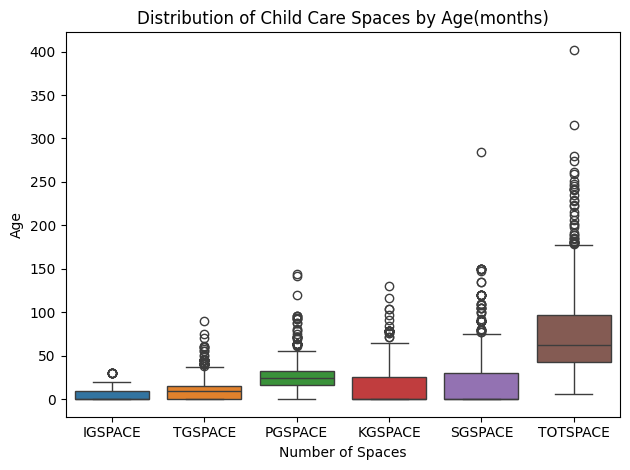

In [7]:
# Numerical variables boxplots
sns.boxplot(data=df[['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE','TOTSPACE']])
# TOTSPACE here is used for comparison
plt.title('Distribution of Child Care Spaces by Age(months)')
plt.xlabel('Number of Spaces')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 49.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 27.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 39.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 17.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 16.8% of the points cannot be plac

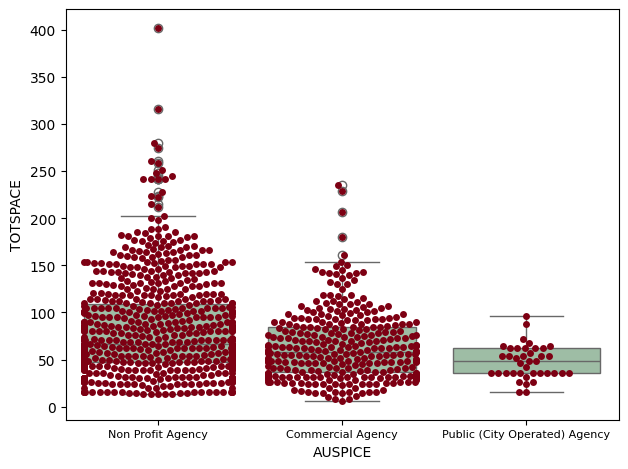

In [8]:
# Generate a boxplot to see the data distribution by treatments. Using boxplot, we can
# easily detect the differences between different treatments
ax = sns.boxplot(x='AUSPICE', y='TOTSPACE', data=df, color='#99c2a2')
ax = sns.swarmplot(x='AUSPICE', y='TOTSPACE', data=df, color='#7d0013')
plt.xticks(fontsize=8)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 34.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 16.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 27.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


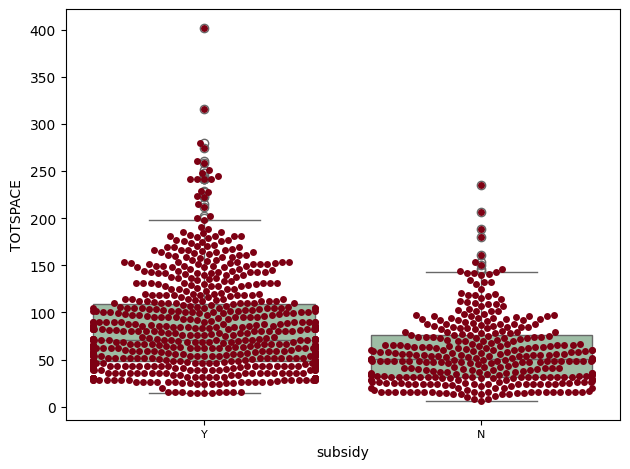

In [9]:
# For subsidy
ax = sns.boxplot(x='subsidy', y='TOTSPACE', data=df, color='#99c2a2')
ax = sns.swarmplot(x='subsidy', y='TOTSPACE', data=df, color='#7d0013')
plt.xticks(fontsize=8)
plt.tight_layout()
plt.show()

# One-Way ANOVA

In [10]:
# Ordinary Least Squares (OLS) model
model = ols('TOTSPACE ~ C(AUSPICE)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

# ANOVA table
res = stat()
res.anova_stat(df=df, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(AUSPICE)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,9.611211e+04,48056.057145,21.843051,5.057716e-10
Residual,1060.0,2.332065e+06,2200.061571,NaN,NaN


In [11]:
# For subsidy
model2 = ols('TOTSPACE ~ C(subsidy)', data=df).fit()
anova_table = sm.stats.anova_lm(model2, typ=2)
anova_table

# ANOVA table
res1 = stat()
res1.anova_stat(df=df, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(subsidy)')
res1.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(subsidy),1.0,1.607654e+05,160765.392950,75.227653,1.550892e-17
Residual,1061.0,2.267412e+06,2137.051825,NaN,NaN


In [12]:
#post hoc test using Scheffe's test or Tukey's HSD
res = stat()
res.tukey_hsd(df=df, res_var='TOTSPACE', xfac_var='AUSPICE', anova_model='TOTSPACE ~ C(AUSPICE)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,17.119417,9.703599,24.535235,7.662434,0.001000
1,Non Profit Agency,Public (City Operated) Agency,34.334610,16.224077,52.445142,6.292710,0.001000
2,Commercial Agency,Public (City Operated) Agency,17.215193,-1.453146,35.883531,3.060857,0.077966


In [13]:
# For subsidy
res1 = stat()
res1.tukey_hsd(df=df, res_var='TOTSPACE', xfac_var='subsidy', anova_model='TOTSPACE ~ C(subsidy)')
res1.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Y,N,26.265831,20.323646,32.208016,12.266022,0.001


# Assumption Checking

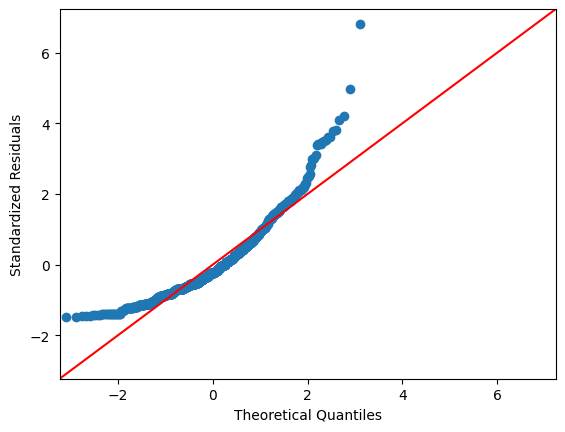

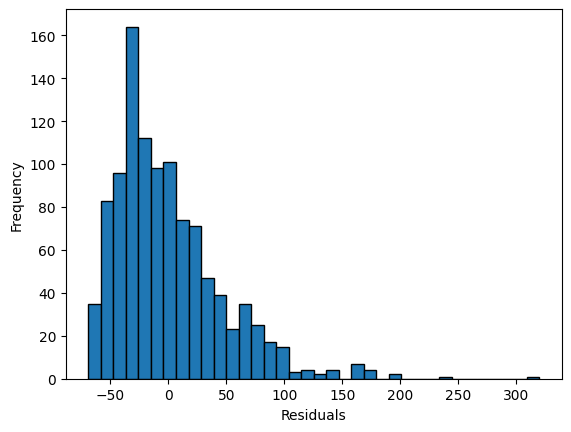

In [14]:
#checking model diagnostics
import statsmodels.api as sm
import matplotlib.pyplot as plt

# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

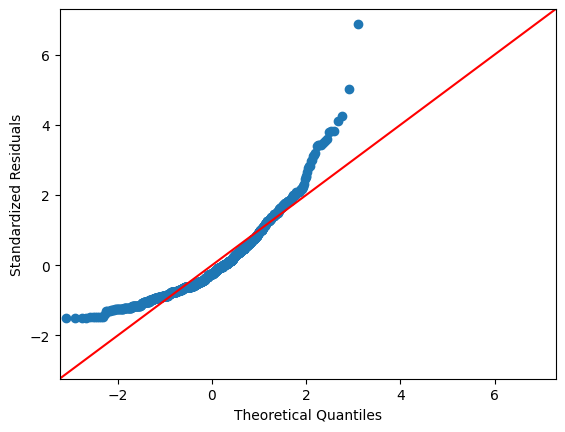

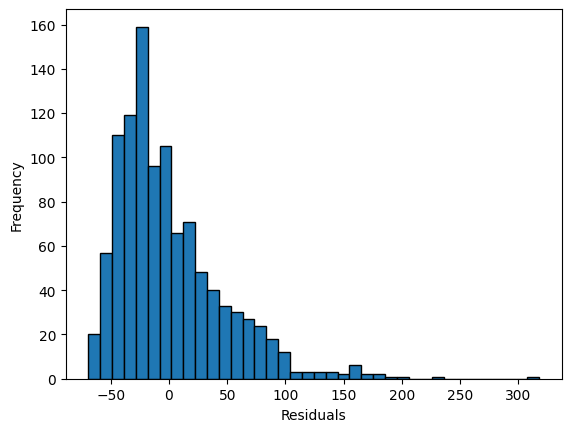

In [15]:
# For subsidy
# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res1.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res1.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [16]:
# Assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model.resid)
print(w,pvalue)

0.901775598526001 1.4964898448030214e-25


In [17]:
# For subsidy
w, pvalue = stats.shapiro(model2.resid)
print(w,pvalue)

0.8925794959068298 1.4240603342711214e-26


In [18]:
# Assumption 2: variances are homoegenous: Bartlett's test when the sample is normally distributed
res = stat()
res.bartlett(df=df, res_var='TOTSPACE', xfac_var='AUSPICE')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),89.586
1,Degrees of freedom (Df),2.000
2,p value,0.000


In [19]:
# For subsidy
res1 = stat()
res1.bartlett(df=df, res_var='TOTSPACE', xfac_var='subsidy')
res1.bartlett_summary

,Parameter,Value
0,Test statistics (T),49.0819
1,Degrees of freedom (Df),1.0000
2,p value,0.0000


In [20]:
# Assumption 2: Homogeneity of variances: Levene's test if the sample data is not normal distribution
res.levene(df=df, res_var='TOTSPACE', xfac_var='AUSPICE')
res.levene_summary

,Parameter,Value
0,Test statistics (W),17.9271
1,Degrees of freedom (Df),2.0000
2,p value,0.0000


In [21]:
# For subsidy
res1.levene(df=df, res_var='TOTSPACE', xfac_var='subsidy')
res1.levene_summary

,Parameter,Value
0,Test statistics (W),22.9889
1,Degrees of freedom (Df),1.0000
2,p value,0.0000


# Two-Way ANOVA

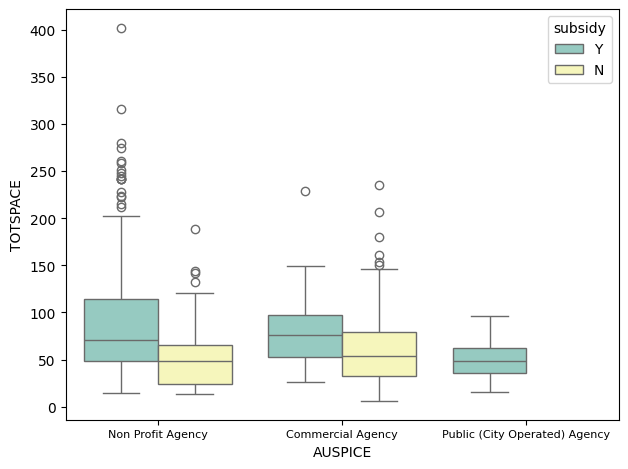

In [22]:
# Specify with subsidy
sns.boxplot(x="AUSPICE", y="TOTSPACE", hue="subsidy",data=df, palette="Set3")
plt.xticks(fontsize=8)
plt.tight_layout()
plt.show()

In [23]:
# Create OLS model
model3 = ols('TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)', data=df).fit()
anova_table = sm.stats.anova_lm(model3, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(AUSPICE),8.567996e+03,2.0,2.057586,1.282730e-01
C(subsidy),8.352744e+04,1.0,40.117876,3.529094e-10
C(AUSPICE):C(subsidy),5.603445e+04,2.0,13.456555,1.694282e-06
Residual,2.202809e+06,1058.0,NaN,NaN


In [24]:
# Summary ANOVA table
res = stat()
res.anova_stat(df=df, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,8.567996e+03,4283.998054,2.057586,1.282730e-01
C(subsidy),1.0,8.352744e+04,83527.441787,40.117876,3.529094e-10
C(AUSPICE):C(subsidy),2.0,5.603445e+04,28017.227037,13.456555,1.694282e-06
Residual,1058.0,2.202809e+06,2082.050461,NaN,NaN


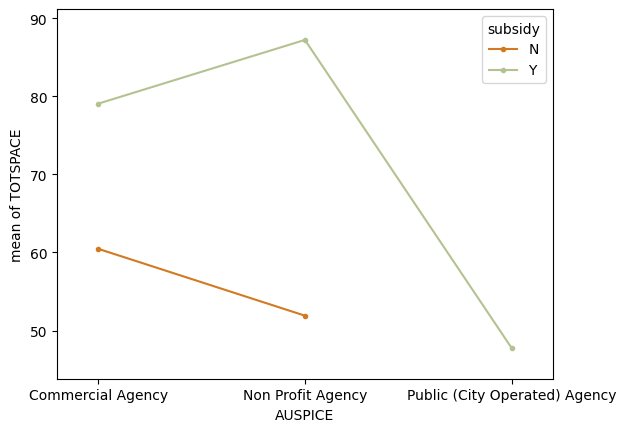

In [25]:
# The interaction effect plot
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig = interaction_plot(x=df['AUSPICE'],trace=df['subsidy'],response=df['TOTSPACE'],colors=['#d17a22','#b4c292'])
plt.show()

In [26]:
# Post-hoc for both effects
res.tukey_hsd(df=df, res_var='TOTSPACE',xfac_var='AUSPICE',anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,17.119417,9.905213,24.333621,7.876596,0.001000
1,Non Profit Agency,Public (City Operated) Agency,34.334610,16.716448,51.952772,6.468588,0.001000
2,Commercial Agency,Public (City Operated) Agency,17.215193,-0.945610,35.375996,3.146407,0.067567


In [27]:
res.tukey_hsd(df=df, res_var='TOTSPACE',xfac_var='subsidy',anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Y,N,26.265831,20.400592,32.13107,12.426982,0.001


In [28]:
res.tukey_hsd(df=df, res_var='TOTSPACE',xfac_var=['AUSPICE','subsidy'],anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Non Profit Agency, Y)","(Non Profit Agency, N)",35.327657,21.377488,49.277825,10.224542,0.001000
1,"(Non Profit Agency, Y)","(Commercial Agency, Y)",8.165515,-7.512442,23.843471,2.102822,0.650278
2,"(Non Profit Agency, Y)","(Commercial Agency, N)",26.764597,16.861524,36.667669,10.911871,0.001000
3,"(Non Profit Agency, Y)","(Public (City Operated) Agency, Y)",39.460387,17.934574,60.986199,7.401338,0.001000
4,"(Non Profit Agency, Y)","(Public (City Operated) Agency, N)",0.000000,-inf,inf,0.000000,0.900000
5,"(Non Profit Agency, N)","(Commercial Agency, Y)",27.162142,7.567922,46.756362,5.596861,0.001135
6,"(Non Profit Agency, N)","(Commercial Agency, N)",8.563060,-6.805934,23.932054,2.249531,0.590448
7,"(Non Profit Agency, N)","(Public (City Operated) Agency, Y)",4.132730,-20.392680,28.658140,0.680345,0.900000
8,"(Non Profit Agency, N)","(Public (City Operated) Agency, N)",0.000000,-inf,inf,0.000000,0.900000
9,"(Commercial Agency, Y)","(Commercial Agency, N)",18.599082,1.646292,35.551872,4.429542,0.021963
